In [1]:
import sys,os
sys.path.append('..')
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.swarms.swarm import Swarm
from backtester.exoinfo import EXOInfo

import pandas as pd
import numpy as np
import scipy

import glob
from pandas.tseries.offsets import *

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

figsize(20,10)

Populating the interactive namespace from numpy and matplotlib


## Rng strategies

In [3]:
#
# random time series
#
df = pd.DataFrame()
for i in range(10):
    
    date = pd.date_range(start='2015-01', end='2016-10', freq='D')
    price = np.random.randint(-100, 102, size=len(date))
    
    ser = pd.Series(price, index=date, name='rng_system'+str(i))
    df['rng_system'+str(i)] = ser.cumsum()

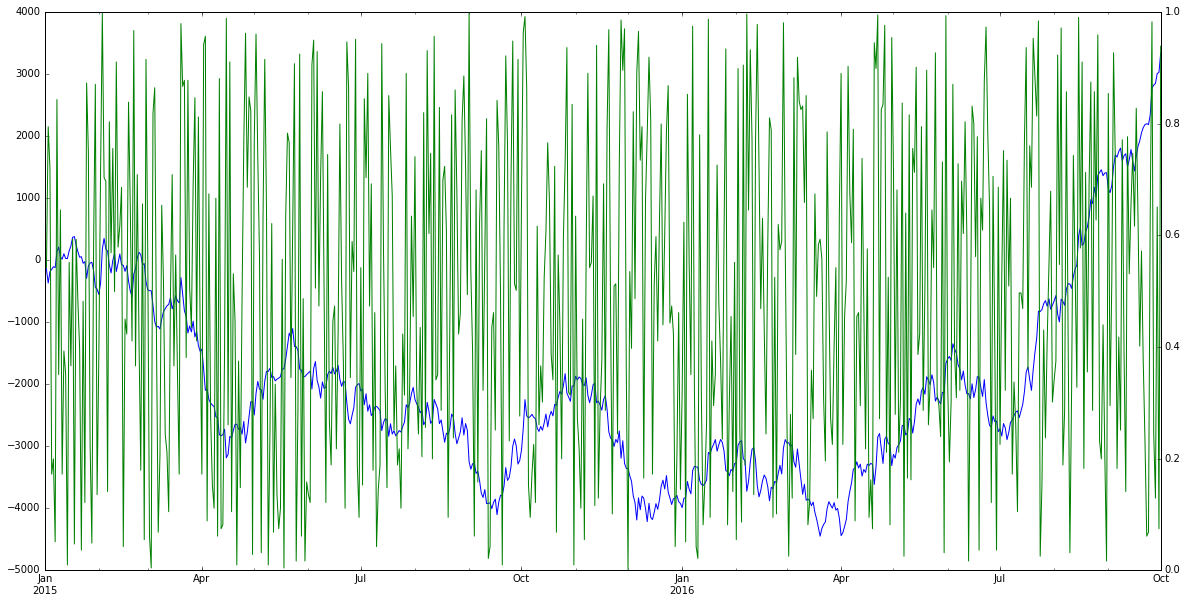

In [4]:
eqty = df.sum(axis=1)
eqty.plot()
#eqty.rolling(5).max().plot()
#eqty.rolling(5).min().plot()
#(eqty - eqty.rolling().max()).plot(secondary_y=True)
#(eqty.rolling(5).max() - eqty.rolling(5).min()).plot(secondary_y=True)
(eqty.rolling(2).max() - eqty.rolling(2).min()).rank(pct=True).plot(secondary_y=True)

In [193]:
swarm_filter = pd.DataFrame()

for col in df.columns:
    eqty = df[col]
    
    #eqty.plot()
    #eqty.rolling(2).max().plot()
    if swarm_filter.size == 0:    
        #swarm_filter[col] = (eqty - eqty.rolling(10).max())
        swarm_filter[col] = (eqty - eqty.rolling(10).mean())
    else:
        #swarm_filter[col] = (eqty - eqty.rolling(10).max())
        swarm_filter[col] = (eqty - eqty.rolling(10).mean())

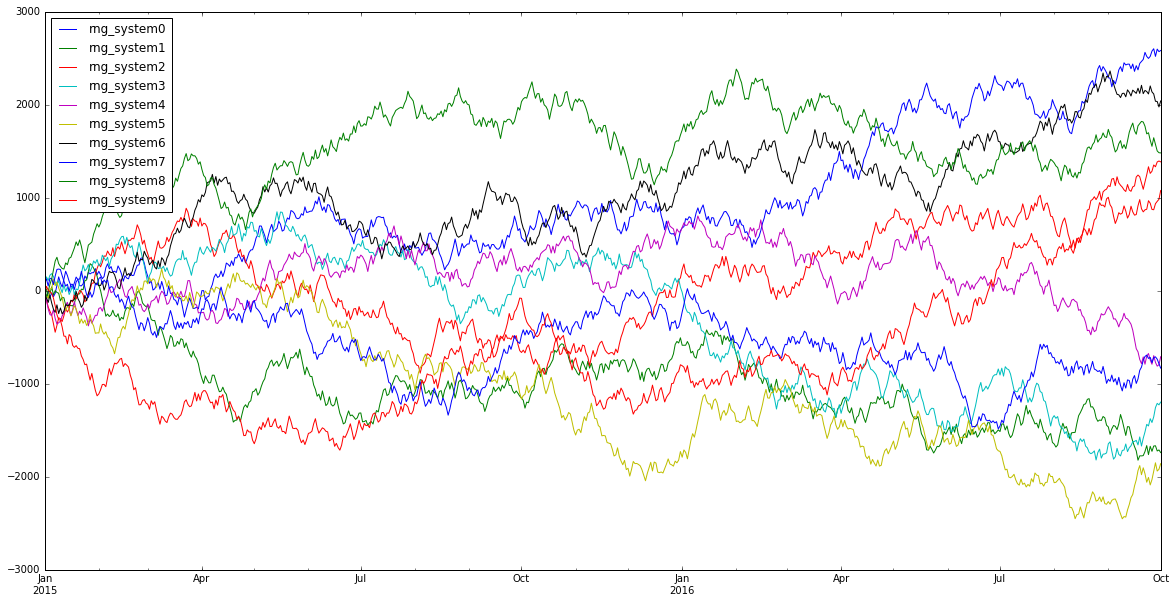

In [194]:
df.plot()
#swarm_filter.mean(1).plot(secondary_y=True)

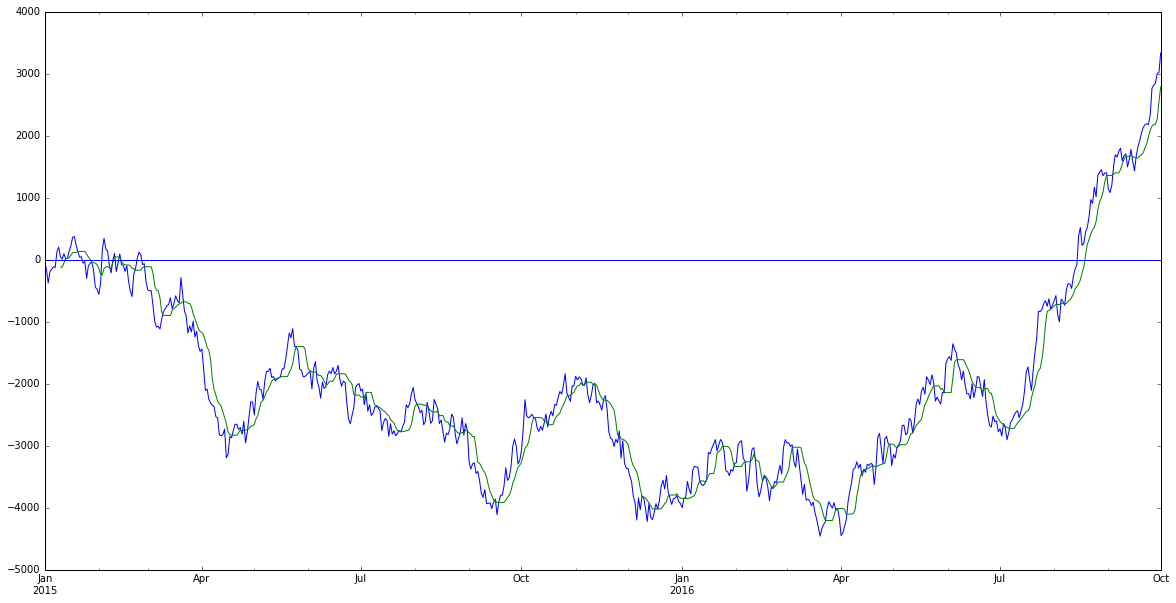

In [6]:
df.sum(axis=1).plot()
df.sum(axis=1).rolling(10).median().plot()
#swarm_filter.mean(1).rolling(10).mean().plot(secondary_y=True)
#swarm_filter.mean(1).plot(secondary_y=True)
axhline(0)

In [196]:
eqty = df.sum(axis=1).diff()
eqty_filter = swarm_filter.mean(1).bfill()

filtered_eqty = eqty.copy()



for i in range(len(eqty)):
    if i > 0:
        if eqty_filter.shift(1)[i] > 0:
            filtered_eqty[i] = eqty[i]
            last_value = eqty[i]
            
        elif eqty_filter.shift(1)[i] < 0:
            filtered_eqty[i] = last_value
            last_value = 0
        

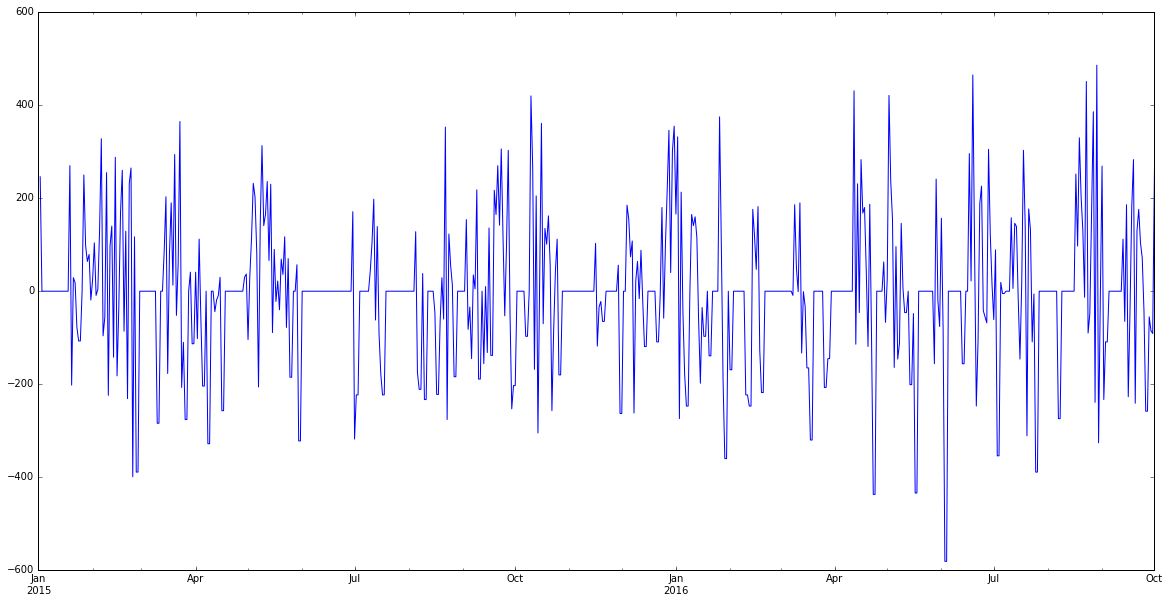

In [197]:
filtered_eqty.plot()

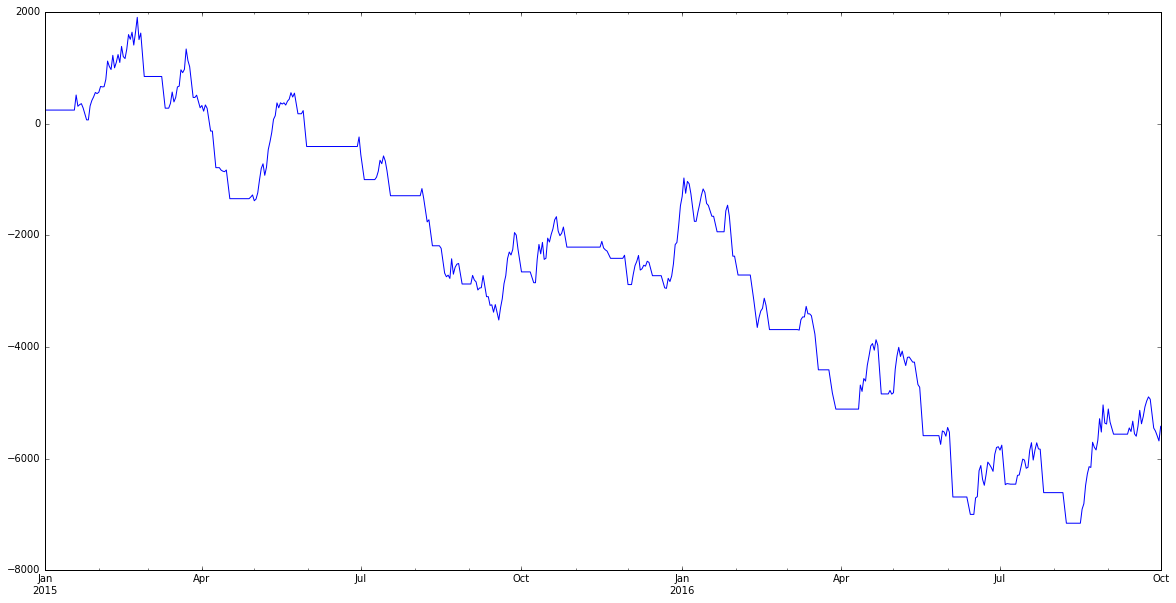

In [198]:
filtered_eqty.cumsum().plot()